# Solve Any Data Analysis Problem

## Chapter 9 - Project 6 - Example solution - Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in our cleaned and filtered traffic data (created in chapter 8, Part 1 of project 6)

In [2]:
traffic = pd.read_parquet("./data/time_series.parquet.gz")
print(traffic.shape)
traffic.head()

(185340, 35)


,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
2488,931855,E,2016,2016-06-06,7,3,Scotland,S92000003,206,East Renfrewshire,...,4.0,33,1.0,0.0,0.0,0.0,0,0.0,1.0,233.0
2489,931855,E,2016,2016-06-06,8,3,Scotland,S92000003,206,East Renfrewshire,...,12.0,30,0.0,3.0,3.0,0.0,1,0.0,7.0,437.0
2490,931855,E,2016,2016-06-06,9,3,Scotland,S92000003,206,East Renfrewshire,...,4.0,21,0.0,1.0,3.0,0.0,0,1.0,5.0,250.0
2491,931855,E,2016,2016-06-06,10,3,Scotland,S92000003,206,East Renfrewshire,...,2.0,36,2.0,0.0,0.0,0.0,0,0.0,2.0,261.0
2492,931855,E,2016,2016-06-06,11,3,Scotland,S92000003,206,East Renfrewshire,...,2.0,43,1.0,2.0,1.0,0.0,0,0.0,4.0,282.0


In [3]:
traffic.columns

Index(['Count_point_id', 'Direction_of_travel', 'Year', 'Count_date', 'hour',
       'Region_id', 'Region_name', 'Region_ons_code', 'Local_authority_id',
       'Local_authority_name', 'Local_authority_code', 'Road_name',
       'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

### Find places where cycling is on the rise

First, create cycling time series.

In [4]:
cycling = (
    traffic
    .groupby(["Count_point_id", "Year"])
    ["Pedal_cycles"]
    .sum()
    .reset_index()
)

cycling.head()

,Count_point_id,Year,Pedal_cycles
0,900056,2007,24
1,900056,2008,19
2,900056,2009,38
3,900056,2010,17
4,900056,2011,8


What's the distribution of total cycles by count point?

In [5]:
cycling_totals = (
    cycling
    .groupby("Count_point_id")
    ["Pedal_cycles"]
    .sum()
)

cycling_totals.head()

Count_point_id
900056    259
919150    274
930188    133
931832    351
931837    102
Name: Pedal_cycles, dtype: int64

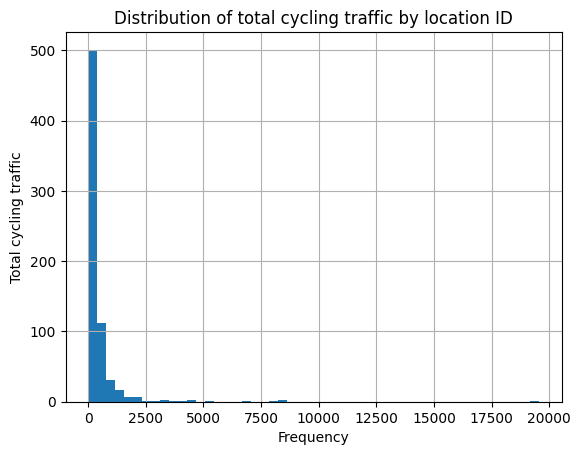

In [6]:
fig, axis = plt.subplots()

cycling_totals.hist(bins=50, ax=axis)

axis.set(
    xlabel="Frequency",
    ylabel="Total cycling traffic",
    title="Distribution of total cycling traffic by location ID"
)

plt.show()

Mostly around zero, so let's look at nonzeros only

In [7]:
cycling_totals.loc[lambda x: x==0]

Series([], Name: Pedal_cycles, dtype: int64)

No actual places with literally zero bike traffic.

In [8]:
cycling_totals.describe()

count      691.000000
mean       455.458755
std       1090.329617
min          5.000000
25%        101.000000
50%        216.000000
75%        421.000000
max      19561.000000
Name: Pedal_cycles, dtype: float64

Top cycling count points

In [9]:
cycling_totals.sort_values(ascending=False).head(10)

Count_point_id
942489    19561
942321     8542
944649     8344
942319     7932
941061     6668
946751     5319
942951     4468
942735     4439
942853     4427
945985     4034
Name: Pedal_cycles, dtype: int64

Let's look at the road with the highest bike usage

In [10]:
(
    traffic[traffic["Count_point_id"] == 942489]
    .head(1)
    .transpose()
)

,91722
Count_point_id,942489
Direction_of_travel,N
Year,2014
Count_date,2014-09-19 00:00:00
hour,7
Region_id,6
Region_name,London
Region_ons_code,E12000007
Local_authority_id,96
Local_authority_name,Islington


Looks like a minor road. Are there any major roads with heavy bike usage (let's say a total of 1000 or more)?

In [11]:
(
    traffic
    .merge(
        cycling_totals
            .reset_index()
            .rename(columns={
                "Pedal_cycles": "Total_cycles"
            }),
        on="Count_point_id"
    )
    .query("Total_cycles > 1000 and Road_type=='Major'")
)

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles,Total_cycles


Nothing! What about at least 100 bikes?

In [12]:
bikes_100_plus = (
    traffic
    .merge(
        cycling_totals
            .reset_index()
            .rename(columns={"Pedal_cycles": "Total_cycles"}),
        on="Count_point_id"
    )
    .query("Total_cycles > 100 and Road_type=='Major'")
)

bikes_100_plus

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles,Total_cycles


OK so it looks like there's basically no bike traffic on major roads where we also have consistent data.

Let's just identify places where the latest bike figure is higher than the first one (i.e. an increase between the first date encountered and the last, a somewhat crude proxy for "increase in cycling")

In [13]:
def cycling_diff(group):
    return group.values[-1] - group.values[0]

def cycling_diff_pct(group):
    if group.values[0] == 0:
        return np.inf
    diff = group.values[-1] - group.values[0]
    return diff / group.values[0]

cycling_diffs = (
    cycling
    .sort_values(["Count_point_id", "Year"])
    .groupby("Count_point_id")
    .agg(
        diff=("Pedal_cycles",cycling_diff),
        diff_pct=("Pedal_cycles",cycling_diff_pct)
    )
)

cycling_diffs

,diff,diff_pct
Count_point_id,,
900056,-10,-0.416667
919150,-1,-0.083333
930188,-2,-0.400000
931832,-10,-0.526316
931837,2,0.666667
...,...,...
990173,23,0.425926
990546,-17,-0.944444
990551,4,0.173913


Let's verify this with an example

In [14]:
cycling[cycling["Count_point_id"] == 900056]

,Count_point_id,Year,Pedal_cycles
0,900056,2007,24
1,900056,2008,19
2,900056,2009,38
3,900056,2010,17
4,900056,2011,8
5,900056,2012,23
6,900056,2013,5
7,900056,2014,19
8,900056,2015,13
9,900056,2016,32


Now find the biggest positive differences

In [15]:
biggest_diffs = (
    cycling_diffs
    [np.isinf(cycling_diffs["diff_pct"]) == False]
    .sort_values("diff_pct", ascending=False)
    .head(10)
)

biggest_diffs

,diff,diff_pct
Count_point_id,,
931883,29,29.000
990552,38,19.000
943399,139,17.375
944961,16,16.000
943595,14,14.000
947607,14,14.000
946565,24,12.000
946375,12,12.000
943535,21,10.500


Let's plot the time series for those count points

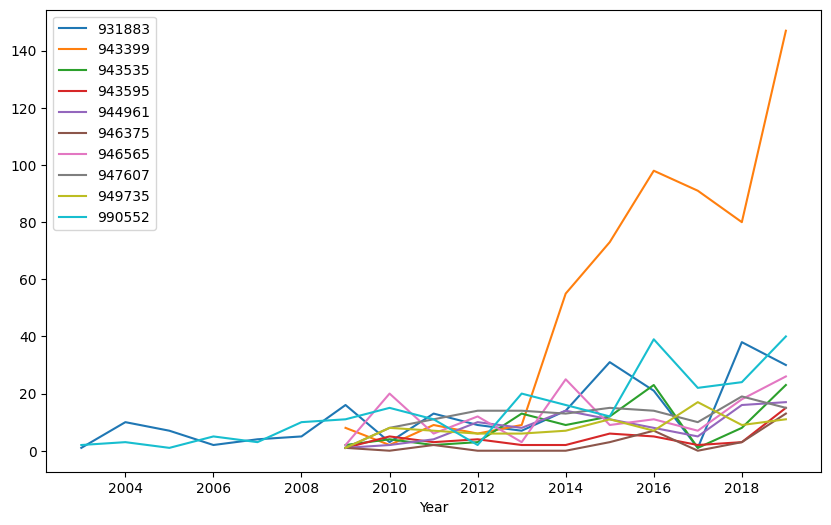

In [16]:
fig, axis = plt.subplots(figsize=(10, 6))

biggest_diff_ids = biggest_diffs.index

diffs_to_plot = (
    cycling
    .query("Count_point_id in @biggest_diff_ids")
)

for count_point_id in diffs_to_plot["Count_point_id"].unique():
    point_series = cycling[cycling["Count_point_id"] == count_point_id]
    point_series.set_index("Year")["Pedal_cycles"].plot(ax=axis, label=count_point_id)

axis.legend()

plt.show()

Plot only a few of these for publication

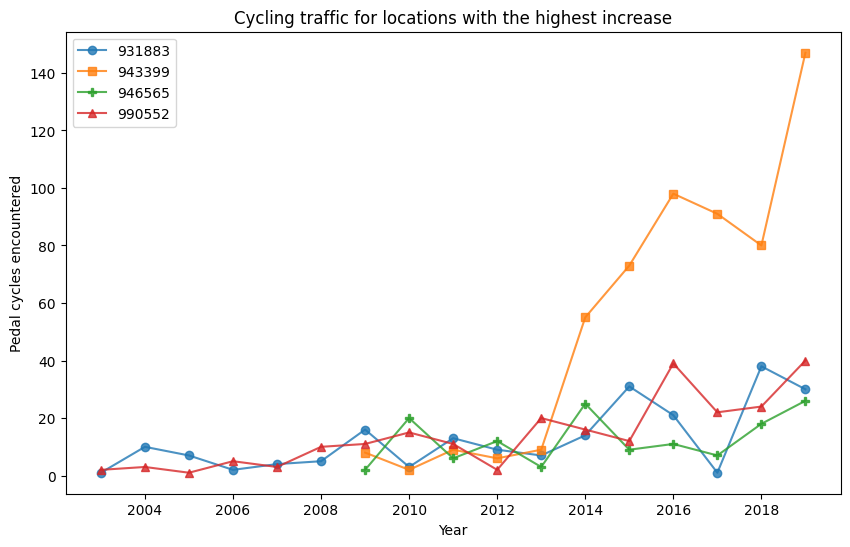

In [17]:
fig, axis = plt.subplots(figsize=(10, 6))

biggest_diff_ids = biggest_diffs.index

ids_to_plot = [943399, 931883, 946565, 990552]

diffs_to_plot = (
    cycling
    .query("Count_point_id in @ids_to_plot")
)

markers = ["o", "s", "P", "^"]

for i, point_id in enumerate(diffs_to_plot["Count_point_id"].unique()):
    point_series = cycling[cycling["Count_point_id"] == point_id]
    (
        point_series
        .set_index("Year")
        ["Pedal_cycles"]
        .plot(ax=axis,
              label=point_id,
              marker=markers[i],
              alpha=0.8)
    )

axis.set(
    xlabel="Year",
    ylabel="Pedal cycles encountered",
    title="Cycling traffic for locations with the highest increase"
)

axis.legend()

plt.show()

Because we're taking the difference between the first and last points, there are some errors, such as a couple of cases where the most recent year saw a decrease in cycling, but we have a few interesting candidates.

This tells us there are some places with significantly increased cycling traffic, but we are still only recording a single day each year so these increases could all be artefacts. There could be special events like road closures and holidays, or just different patterns between different days of the week.

Instead, let's focus on places with the highest percentage of bike traffic in their most recent year.

When looking at the cycling data, the metadata PDF (https://storage.googleapis.com/dft-statistics/road-traffic/all-traffic-data-metadata.pdf, page 10) says the `All motor vehicles` is _All vehicles except pedal cycles_ so we need to add the pedal cycles on to see what percentage of all traffic is bikes.

In [18]:
annual_bike_traffic = (
    traffic
    [traffic['Count_date'] == traffic.groupby('Count_point_id')['Count_date'].transform('max')]
    .assign(
        all_traffic=lambda x: x["Pedal_cycles"] + x["All_motor_vehicles"]
    )
    .groupby(["Count_point_id", "Year"])
    [["Pedal_cycles", "all_traffic"]]
    .sum()
    .assign(
        pct_cycles = lambda x: x["Pedal_cycles"] / x["all_traffic"]
    )
    .sort_values("pct_cycles", ascending=False)
)

annual_bike_traffic.head()

,,Pedal_cycles,all_traffic,pct_cycles
Count_point_id,Year,,,
942489,2019,1748,2004.0,0.872255
945923,2019,352,522.0,0.674330
941061,2019,769,1466.0,0.524557
945955,2019,245,684.0,0.358187
944077,2019,64,183.0,0.349727


Now we're getting somewhere!

There are a few places with over 50% of traffic being bikes, let's take a look

In [19]:
(
    traffic[(traffic["Count_point_id"] == 942489) & (traffic["Year"] == 2019)]
    .head(1)
    .transpose()
)

,4337551
Count_point_id,942489
Direction_of_travel,S
Year,2019
Count_date,2019-09-20 00:00:00
hour,9
Region_id,6
Region_name,London
Region_ons_code,E12000007
Local_authority_id,96
Local_authority_name,Islington


That's the same one we saw earlier as the road with the highest bike traffic.

These look like interesting cases of small suburban streets being used by cyclists perhaps as a commuting shortcut.

Let's now look at places with more commuter bike traffic.

Specifically, we'll:
 - take only the latest year for each point
 - calculate the percentage of bike traffic seen per hour for that latest date
 - and look at the distribution of that figure across points and hours of the day

The output should be a box plot per hour of the day, and each value within represents the percentage of bike traffic that took place in that hour at a particular point.

In SQL, you could do this using the `PARTITION BY` keyword to calculate group-level totals at the same time as calculating the percentage.

According to ChatGPT, we can achieve the same effect in pandas with `.transform`

In [20]:
# Filter the rows for the last date in each LocationID partition
traffic_max_dates = (
    traffic[
        traffic['Count_date']
        == traffic.groupby('Count_point_id')['Count_date'].transform('max')
    ]
    .copy()
)

In [21]:
# now we need to aggregate the data to an hourly level (because we might have multiple directions for the same location+date+hour)
cycling_daily_hourly = (
    traffic_max_dates.groupby(
        ["Count_point_id", "Count_date", "hour"]
    )
    ["Pedal_cycles"]
    .sum()
    .reset_index()
)

cycling_daily_hourly.head()

,Count_point_id,Count_date,hour,Pedal_cycles
0,900056,2019-05-20,7,2
1,900056,2019-05-20,8,0
2,900056,2019-05-20,9,0
3,900056,2019-05-20,10,0
4,900056,2019-05-20,11,2


In [22]:
# Calculate the total count for each date within each LocationID partition
cycling_daily_hourly['TotalDailyCount'] = (
    cycling_daily_hourly
    .groupby(['Count_point_id', 'Count_date'])
    ['Pedal_cycles']
    .transform('sum')
)

# Calculate the percentage for the 'Count' column
cycling_daily_hourly['hourly_pct'] = (
    cycling_daily_hourly['Pedal_cycles']
    / cycling_daily_hourly['TotalDailyCount']
)

cycling_daily_hourly

,Count_point_id,Count_date,hour,Pedal_cycles,TotalDailyCount,hourly_pct
0,900056,2019-05-20,7,2,14,0.142857
1,900056,2019-05-20,8,0,14,0.000000
2,900056,2019-05-20,9,0,14,0.000000
3,900056,2019-05-20,10,0,14,0.000000
4,900056,2019-05-20,11,2,14,0.142857
...,...,...,...,...,...,...
8287,996188,2019-05-23,14,0,15,0.000000
8288,996188,2019-05-23,15,2,15,0.133333
8289,996188,2019-05-23,16,1,15,0.066667
8290,996188,2019-05-23,17,2,15,0.133333


Now verify this with an example

In [23]:
traffic_max_dates.loc[traffic_max_dates["Count_point_id"] == 900056, "Count_date"].max()

Timestamp('2019-05-20 00:00:00')

In [24]:
(
    cycling_daily_hourly
    [
        (cycling_daily_hourly["Count_point_id"] == 900056)
        & (cycling_daily_hourly["Count_date"] == "2019-05-20")
    ]
)

,Count_point_id,Count_date,hour,Pedal_cycles,TotalDailyCount,hourly_pct
0,900056,2019-05-20,7,2,14,0.142857
1,900056,2019-05-20,8,0,14,0.000000
2,900056,2019-05-20,9,0,14,0.000000
3,900056,2019-05-20,10,0,14,0.000000
4,900056,2019-05-20,11,2,14,0.142857
5,900056,2019-05-20,12,0,14,0.000000
6,900056,2019-05-20,13,0,14,0.000000
7,900056,2019-05-20,14,2,14,0.142857
8,900056,2019-05-20,15,0,14,0.000000
9,900056,2019-05-20,16,1,14,0.071429


So here we would expect zeros and values of 1/14, 2/14 (1/7) and 5/14 for percentage counts.

Looks good! Finally, let's look at the distribution of those hourly percentage values.

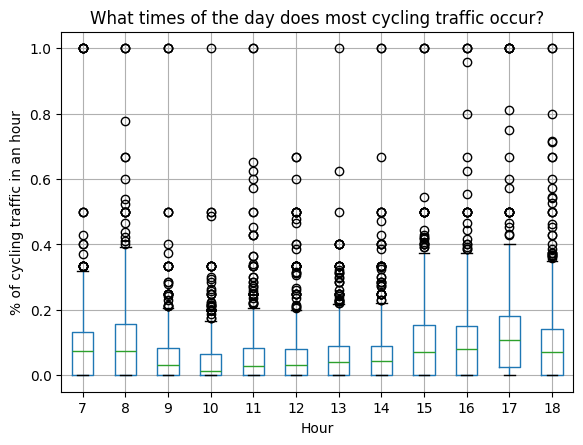

In [25]:
fig, axis = plt.subplots()

cycling_daily_hourly.boxplot(
    column="hourly_pct",
    by="hour",
    ax=axis)

axis.set(
    xlabel="Hour",
    ylabel= "% of cycling traffic in an hour",
    title="What times of the day does most cycling traffic occur?"
)

plt.suptitle(None)

plt.show()

Lots of outliers of course, but we can see that more cycling happens at commuting times.

Let's find some examples where the highest cycling hour was either 8am or 5pm.

Use our hourly-aggregated data to find the hour with the most traffic for each location ID

In [26]:
def get_highest_hour(rows):
    # return NaN if all counts are the same
    if rows["Pedal_cycles"].min() == rows["Pedal_cycles"].max():
        return np.NaN
    
    return (
        rows
        # what if multiple rows have the same max value?
        # return the earliest, the first daily peak
        # not ideal but we need to decide *something*
        .sort_values(by=["Pedal_cycles", "hour"], ascending=[False, True])
        .head(1)
        ["hour"]
        .values[0]
    )

highest_hours = (
    cycling_daily_hourly
    .groupby("Count_point_id")
    .apply(get_highest_hour)
)

highest_hours.head()

Count_point_id
900056    17.0
919150    17.0
930188    18.0
931832    16.0
931837     8.0
dtype: float64

Let's also see an example where we needed a tie break

In [27]:
cycling_daily_hourly[cycling_daily_hourly["Count_point_id"] == 941463]

,Count_point_id,Count_date,hour,Pedal_cycles,TotalDailyCount,hourly_pct
1476,941463,2019-09-10,7,8,53,0.150943
1477,941463,2019-09-10,8,10,53,0.188679
1478,941463,2019-09-10,9,3,53,0.056604
1479,941463,2019-09-10,10,4,53,0.075472
1480,941463,2019-09-10,11,1,53,0.018868
1481,941463,2019-09-10,12,1,53,0.018868
1482,941463,2019-09-10,13,2,53,0.037736
1483,941463,2019-09-10,14,2,53,0.037736
1484,941463,2019-09-10,15,3,53,0.056604
1485,941463,2019-09-10,16,10,53,0.188679


What comes out as the busiest hour for cycling?

In [28]:
highest_hours.loc[941463]

8.0

It's the first row by default. Something to be aware of.

Now let's look at the distribution of "busiest cycling hour" by location

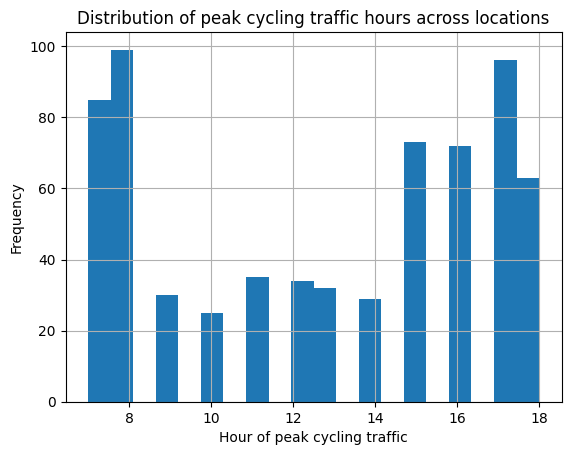

In [29]:
fig, axis = plt.subplots()

highest_hours.hist(bins=20, ax=axis)

axis.set(
    xlabel="Hour of peak cycling traffic",
    ylabel="Frequency",
    title="Distribution of peak cycling traffic hours across locations"
)

plt.show()

Let's see if we can use what we found to cut down locations to those where:

- at least X% of their traffic is cycling (where we define X)
- there has been at least a Y% increase in cycling (where we define Y)
- the highest hours of cycling traffic is at 8am or 5pm

To find a good value of X, we need to know the distribution of cycling percentages. It'll likely be heavily right-skewed.

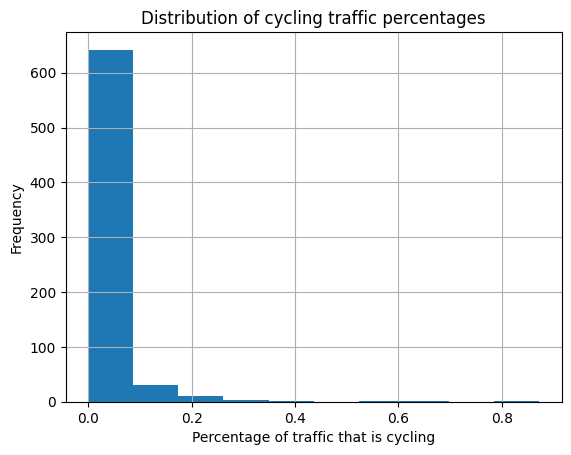

In [30]:
fig, axis = plt.subplots()

annual_bike_traffic["pct_cycles"].hist(bins=10, ax=axis)

axis.set(
    xlabel="Percentage of traffic that is cycling",
    ylabel="Frequency",
    title="Distribution of cycling traffic percentages"
)

plt.show()

In [31]:
BIKE_PERCENTAGE_CUTOFF = 0.1

highest_cycling = (
    annual_bike_traffic
    [annual_bike_traffic["pct_cycles"] >= BIKE_PERCENTAGE_CUTOFF]
    .reset_index()
    ["Count_point_id"]
    .to_list()
)

print(len(highest_cycling))

print(highest_cycling[:10])

38
[942489, 945923, 941061, 945955, 944077, 945393, 931932, 941045, 946765, 942487]


In [32]:
DIFF_CUTOFF = 0.5

biggest_increases = (
    cycling_diffs
    [(cycling_diffs["diff_pct"] >= DIFF_CUTOFF)
     & (np.isinf(cycling_diffs["diff_pct"]) == False)]
    .index
    .to_list()
)

print(len(biggest_increases))

print(biggest_increases[:10])

230
[931837, 931870, 931872, 931873, 931883, 931910, 940023, 940085, 940091, 940135]


In [33]:
highest_commuting = (
    highest_hours
    .loc[lambda x: x.isin([8, 17])]
    .index
    .to_list()
)

print(len(highest_commuting))

print(highest_commuting[:10])

195
[900056, 919150, 931837, 931870, 931910, 940007, 940023, 940047, 940091, 940205]


Now find the intersection of all 3 of these lists.

Python trick: turn them into sets

In [34]:
top_cycling_locations = (
    set(highest_cycling)
    .intersection(set(biggest_increases))
    .intersection(set(highest_commuting))
)

print(len(top_cycling_locations))

print(top_cycling_locations)

11
{945955, 941061, 944713, 943405, 942957, 942735, 943471, 942739, 942899, 967549, 946751}


We have some results! Let's look at what locations they translate to by looking at our raw data again

In [35]:
LOCATION_COLUMNS = ['Count_point_id', 'Region_name',
                    'Region_ons_code', 'Local_authority_id',
                    'Local_authority_name', 'Local_authority_code',
                    'Road_name', 'Road_category', 'Road_type']

(
    traffic[traffic["Count_point_id"].isin(top_cycling_locations)]
    .drop_duplicates(subset=["Count_point_id"])
    [LOCATION_COLUMNS]
    .sort_values(["Region_name", "Local_authority_name"])
)

,Count_point_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,Road_category,Road_type
91927,941061,East of England,E12000006,97,Cambridgeshire,E10000003,U,MCU,Minor
74939,942899,London,E12000007,178,Kingston upon Thames,E09000021,U,MCU,Minor
76690,942739,London,E12000007,107,Lambeth,E09000022,U,MCU,Minor
85920,942735,London,E12000007,107,Lambeth,E09000022,C,MCU,Minor
81137,942957,London,E12000007,93,Tower Hamlets,E09000030,C,MCU,Minor
157760,943405,North East,E12000001,101,Gateshead,E08000037,U,MCU,Minor
157808,943471,North East,E12000001,170,Middlesbrough,E06000002,U,MCU,Minor
68650,944713,North West,E12000002,74,Warrington,E06000007,U,MCU,Minor
122686,967549,Scotland,S92000003,29,City of Edinburgh,S12000036,U,MCU,Minor
111148,945955,South East,E12000008,142,Oxfordshire,E10000025,U,MCU,Minor


Quite a variety of locations to investigate. This is a good time to present these results to stakeholders and see where to go from there!

### Forecasting

Finally, let's see if forecasting is possible with what little data we have.

Let's pick an example time series with high cycling and the most years of data.

In [36]:
(
    traffic
    .query("Count_point_id in @biggest_increases")
    .groupby("Count_point_id")
    ["Year"]
    .agg(["min", "max"])
    .assign(diff=lambda df_: df_["max"] - df_["min"])
    .sort_values("diff", ascending=False)
    .head()
)

,min,max,diff
Count_point_id,,,
996188,2000,2019,19
983147,2000,2019,19
967547,2000,2019,19
967444,2000,2019,19
967514,2000,2018,18


Let's arbitrarily pick the first one from that list

In [37]:
cycling_ts = (
    traffic[traffic["Count_point_id"] == 996188]
    .groupby("Year")
    ["Pedal_cycles"]
    .sum()
)

cycling_ts

Year
2000     3
2001     0
2002     9
2003     6
2004     1
2005     9
2006     1
2007     4
2008     6
2009     6
2010     6
2011     7
2012     5
2013    16
2014     7
2015    11
2016    16
2017    10
2018    10
2019    15
Name: Pedal_cycles, dtype: int64

The index will need to be a date, not integers

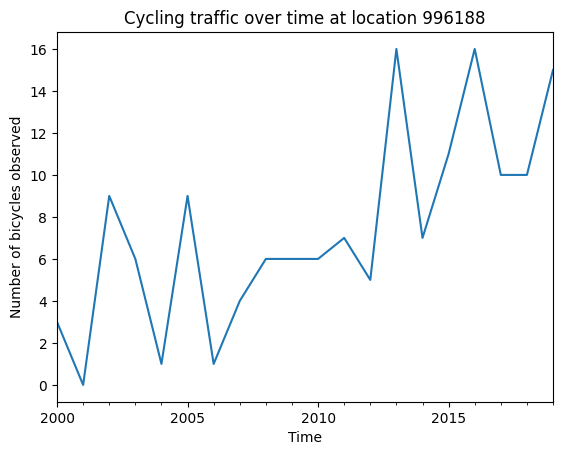

In [38]:
cycling_ts.index = pd.to_datetime(cycling_ts.index, format='%Y')

fig, axis = plt.subplots()

cycling_ts.plot(ax=axis)

axis.set(
    xlabel="Time",
    ylabel="Number of bicycles observed",
    title="Cycling traffic over time at location 996188"
)

plt.show()

So we have 19 points of an annual time series. Possibly enough to forecast 1-2 years into the future.

Let's first try decomposing the time series into its constituent parts to see the underlying trend (and possible seasonality).

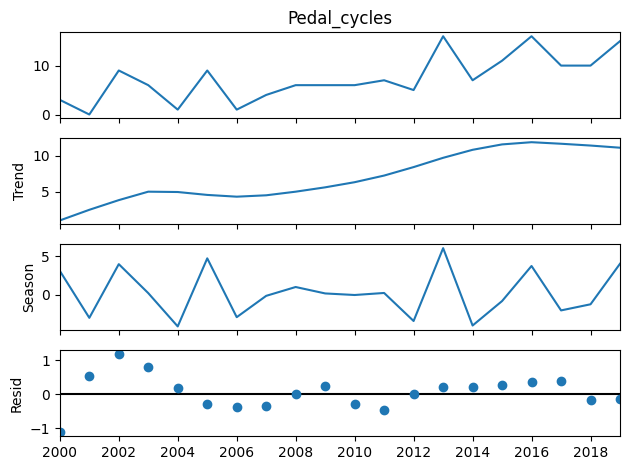

In [39]:
from statsmodels.tsa.seasonal import STL

stl = STL(cycling_ts, period=2, seasonal=3)
result = stl.fit()

result.plot();

#### Forecasting with ARIMA

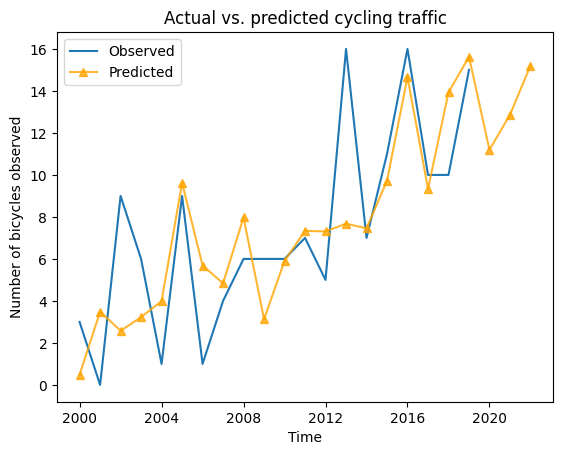

In [40]:
import pmdarima as pm

model = pm.auto_arima(cycling_ts, seasonal=False)

training_predictions = model.predict_in_sample()
forecast = model.predict(3)

predictions = pd.concat(
    [training_predictions,
     forecast]
)

fig, axis = plt.subplots()

axis.plot(cycling_ts, label="Observed")
axis.plot(predictions,
          label="Predicted",
          marker="^",
          color="orange",
          alpha=0.8)

axis.set(
    xlabel="Time",
    ylabel="Number of bicycles observed",
    title="Actual vs. predicted cycling traffic"
)

axis.legend()

plt.show()